In [1]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_lfw_people
from sklearn import svm

In [2]:
# loading the dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

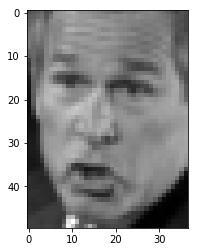

In [4]:
plt.imshow(lfw_people.images[6],cmap='gray')
plt.show()

In [5]:
x_train,x_test, y_train,y_test = train_test_split(lfw_people.data, lfw_people.target,random_state = 1234)

# Simple SVM model

In [6]:
model = svm.SVC(kernel='rbf', class_weight='balanced')
model.fit(x_train, y_train)

d:\language\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions, target_names = lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.17      1.00      0.30        56
  Donald Rumsfeld       0.00      0.00      0.00        35
    George W Bush       0.00      0.00      0.00       137
Gerhard Schroeder       0.00      0.00      0.00        28
      Hugo Chavez       0.00      0.00      0.00        19
       Tony Blair       0.00      0.00      0.00        34

        micro avg       0.17      0.17      0.17       322
        macro avg       0.02      0.14      0.04       322
     weighted avg       0.03      0.17      0.05       322



d:\language\python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# PCA to reduce the dimensions

In [8]:
n_components = 100
pca = PCA( n_components=n_components, whiten=True).fit(lfw_people.data)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca.shape

(966, 100)

In [9]:
model_pca = svm.SVC(kernel='rbf',class_weight='balanced')
model_pca.fit(x_train_pca, y_train)

d:\language\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
predictions_pca = model_pca.predict(x_test_pca)
print(classification_report(y_test, predictions_pca, target_names = lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.82      0.69      0.75        13
     Colin Powell       0.77      0.84      0.80        56
  Donald Rumsfeld       0.89      0.71      0.79        35
    George W Bush       0.85      0.96      0.90       137
Gerhard Schroeder       0.81      0.79      0.80        28
      Hugo Chavez       1.00      0.32      0.48        19
       Tony Blair       0.80      0.82      0.81        34

        micro avg       0.83      0.83      0.83       322
        macro avg       0.85      0.73      0.76       322
     weighted avg       0.84      0.83      0.82       322



# Parameters adjustment

In [11]:
param_grid = {
        'C':[0.1,1,5,10,100],
        'gamma':[0.0005, 0.001, 0.005, 0.01]
}

model_grid = GridSearchCV(svm.SVC(kernel='rbf', class_weight='balanced'),param_grid = param_grid)
model_grid.fit(x_train_pca, y_train)
print(model_grid.best_estimator_)
print(model_grid.best_params_)

d:\language\python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
d:\language\python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'C': 1, 'gamma': 0.005}


In [12]:
predictions_grid = model_grid.predict(x_test_pca)
print(classification_report(y_test, predictions_grid, target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.77      0.61        13
     Colin Powell       0.79      0.80      0.80        56
  Donald Rumsfeld       0.87      0.77      0.82        35
    George W Bush       0.91      0.92      0.92       137
Gerhard Schroeder       0.80      0.86      0.83        28
      Hugo Chavez       0.91      0.53      0.67        19
       Tony Blair       0.80      0.82      0.81        34

        micro avg       0.84      0.84      0.84       322
        macro avg       0.80      0.78      0.78       322
     weighted avg       0.85      0.84      0.84       322



# More accurate parameters

In [13]:
param_grid_small = {'C': [0.1, 0.6, 1, 2, 3],
              'gamma': [0.003, 0.004, 0.005, 0.006, 0.007], }
model_grid_small = GridSearchCV(svm.SVC(kernel='rbf', class_weight='balanced'), param_grid_small)
model_grid_small.fit(x_train_pca, y_train)
print(model_grid_small.best_estimator_)
print(model_grid_small.best_params_)

d:\language\python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
d:\language\python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.006, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'C': 1, 'gamma': 0.006}


In [14]:
predictions_grid_small = model_grid_small.predict(x_test_pca)
print(classification_report(y_test, predictions_grid_small, target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.69      0.62        13
     Colin Powell       0.75      0.80      0.78        56
  Donald Rumsfeld       0.84      0.77      0.81        35
    George W Bush       0.91      0.93      0.92       137
Gerhard Schroeder       0.80      0.86      0.83        28
      Hugo Chavez       1.00      0.47      0.64        19
       Tony Blair       0.80      0.82      0.81        34

        micro avg       0.84      0.84      0.84       322
        macro avg       0.81      0.76      0.77       322
     weighted avg       0.84      0.84      0.83       322

